In [100]:
# Step 1: Library and Dataset loading

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

# Load dataset
df=pd.read_csv('advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [102]:
# Step 2: Data Preprocessing

# Check for missing values
df.isnull().sum()


,0
TV,0
radio,0
newspaper,0
sales,0


In [103]:
# check for Duplicates
df.duplicated().sum()

0

In [104]:
# check for outliers
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [105]:
# Check if outlier exit
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
outliers.sum()


2

In [106]:
# What is the value of the outliers
df[((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


,TV,radio,newspaper,sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


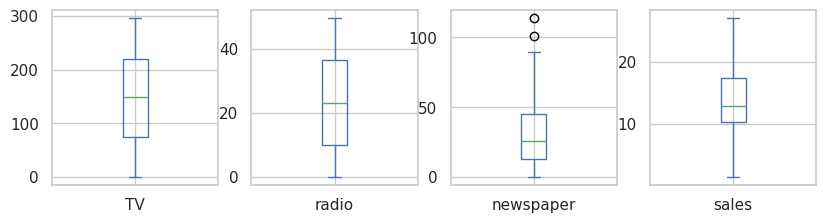

In [107]:
# Check for outliers using boxplot
df.plot(kind='box', subplots=True, layout=(2, 6), figsize=(15, 5))
plt.show()


In [108]:
# Remove Outliers
df = df[~outliers]
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


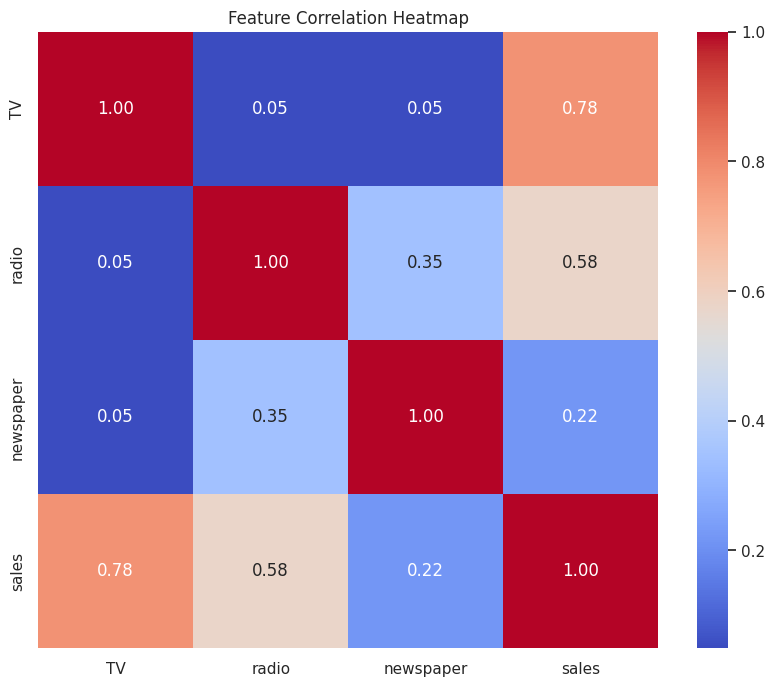

In [109]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

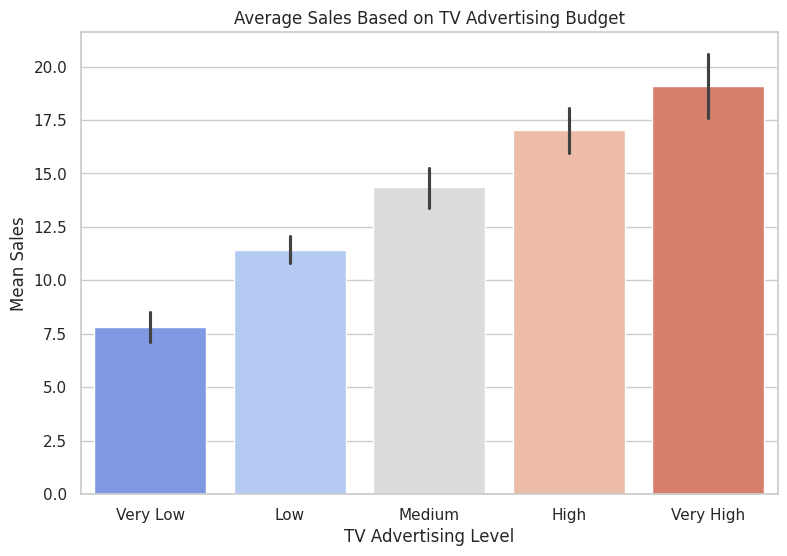

In [110]:
# Bar Plot (Mean Sales by TV Advertising)
df['TV_Bins'] = pd.cut(df['TV'], bins=5, labels=["Very Low", "Low", "Medium", "High", "Very High"])
plt.figure(figsize=(9, 6))
sns.barplot(x=df['TV_Bins'], y=df['sales'], palette="coolwarm")
plt.title("Average Sales Based on TV Advertising Budget")
plt.xlabel("TV Advertising Level")
plt.ylabel("Mean Sales")
plt.show()

In [111]:
# Step 4: Model Building

# Define features and target variable
X = df[['TV', 'radio', 'newspaper']]
y = df['sales']

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [115]:
#Step 5: Model Evaluation

# Predict on test data
y_pred = model.predict(X_test)

# Calculate evaluation metrics

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Print results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)




Mean Absolute Error: 1.2497394075236383
Mean Squared Error: 2.7409119066899947
Root Mean Squared Error: 1.6555699642993027
R-squared: 0.8989454779619588


In [118]:
# Save the trained model for deployment
pkl.dump(model, open('model.pkl', 'wb'))